#### Vinícius Rodrigues Ferraz

## Neural Networks

**Neural Networks are based on how the Human brain works.  
Like in Biology, a Neuron is the basic unit of a Neural Network.**

### **Neuron**  
**In a simple way, a Neuron do 2 things:**
* **Receive inputs from other Neurons and put them together**  
* **Perform some transformation to get it's output**  

<img src="img/Neuron.jpg" alt="drawing" width="300" align="left"/>

### A Neural Network is made of multiple layers of Neurons
<img src="img/images.jpeg" alt="drawing" width="300" align="left"/>

**The First layer is called Input Layer  
The Last layer is called Output Layer  
The layers between them are the Hidden Layers**

**Loss Function: Metric used to describe how badly the model is performing.**
* **We have to find the best paramethers that minimizes the Loss Function.**

**Gradient Descent: Used to minimize the Loss Function.**
* **Gradient Descent moves the paramethers for the direction where the Loss Function decreases**

**Backpropagation: The gradient we need to update an earlier layer can be expressed as a simple function of the gradient in the layeres after it.**
* **Grad_layer1 = F(grad_layer2).**
* **Grad_layer2 - F(grad_layer3)...**
* **For that reason we can start the calculation in the last layer, then we can propagate it backs to the previous and so on. This is called Backpropagation, since we propagates backwards our calculations from layer N to layer 1.**

**Overfitting: The model fits so well the training set that it fails to generalize to unseen examples**
* **Solutions:**
    * **L2 Regularization:**
        * **Penalize extra large parameters: New_Loss = Training_Loss + lambda * ||w||²**
        * **Squared value of parameters grows up as parameters grows up.**
    * **Early Stopping:**
        * **Take the point where the dev_Loss (test_Loss) is the lowest (not the train_loss)**
    * **Dropout:**
        * **Drop Neurons of the network randomly. Since the model doesn't know which Neuron will be dropped out, it's forced to not overly on key neurons**
        
**Hyper-Parameters: Number of hidden layers, Neurons per layer, activon function.  
We need to search for the hyper-parameters that perform better on our validation set.**

 ## This is my first Neural Network

**First of all, I'll find some work to take as base, so i can learn the process and apply it for myself later.**

**Notes:**
* **This first implementation, I found in kaggle. All merits must be given to the author:**
    * **https://www.kaggle.com/benybrahim/multilayer-perceptron-for-beginner-simple**
    ****
* **All the base theory is simplified, it's a practice work.  
I'll document the code but don't be afraid to ask me if you have any questions.**  

**We can use a simple neural networks to classify handwritten digits (0-9) based on the pixel values from MNIST Dataset images**  

## Imports & Setup

In [1]:
#!pip install keras
#!pip install tensorflow

In [5]:
import numpy as np
import sys
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import pandas as pd
%matplotlib inline

Using TensorFlow backend.


## Getting and Knowing Data

In [6]:
# importing train and test files with pandas
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [7]:
# How our data looks
train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train.shape

(42000, 785)

In [10]:
test.shape

(28000, 784)

Train have 784 inputs + 1 column for the classes

## Pre-Processing

In [11]:
# Fixing random values for future reprodutions
seed = 7
np.random.seed(seed)

In [12]:
# Getting the pixels
images = train.iloc[:,1:].values #ignoring the labels (first column)
images = images.astype(np.float) #setting type as float

# Getting the labels
labels = train.iloc[:,0].values
labels

array([1, 0, 1, ..., 7, 6, 9])

**Normalizing the pixel values to the range 0-1**

**In this example we are going to classify the MNIST dataset (handwritten digits 0-9), so it's a multi-class problem.  
As such, it's a good pratice to use a One-Hot encoding.**

In [10]:
# Normalizing 
images = images / 255

# Getting the number of inputs
num_pixels = images.shape[1]

# Creating the categories
labels = np_utils.to_categorical(labels)
num_classes = labels.shape[1]

#### Defining the Model

**Our model is a simple Neural Network with only one hidden layer.**  
**The number of neurons is the same of the number of inputs (784).**  
**Relu is used as rectifier activation function.**

**Softmax is used in the output layer to return probability-like values.    
For this example we use Logarithmic Loss as loss function (categorical_crossentropy in keras).   
ADAM gradient descent is used to learn the weights.**

In [11]:
def MLP():
    # Creating the model
    model = Sequential()
    # Hidden Layer
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer="normal", activation="relu"))
    # Output Layer
    model.add(Dense(num_classes, kernel_initializer="normal", activation="softmax"))
    
    #compiling the model
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
    return model

In [12]:
num_classes

10

In [13]:
num_pixels

784

In [14]:
labels.shape

(42000, 10)

In [15]:
images.shape

(42000, 784)

In [16]:
model0 = MLP()
model0.fit(images, labels, epochs=10, batch_size=200, verbose=2);

{
    "tags": [
        "remove_output",
    ]
}

Epoch 1/10
 - 7s - loss: 0.3202 - accuracy: 0.9087
Epoch 2/10
 - 6s - loss: 0.1308 - accuracy: 0.9632
Epoch 3/10
 - 6s - loss: 0.0862 - accuracy: 0.9752
Epoch 4/10
 - 5s - loss: 0.0602 - accuracy: 0.9830
Epoch 5/10
 - 5s - loss: 0.0441 - accuracy: 0.9877
Epoch 6/10
 - 5s - loss: 0.0332 - accuracy: 0.9907
Epoch 7/10
 - 6s - loss: 0.0243 - accuracy: 0.9941
Epoch 8/10
 - 5s - loss: 0.0176 - accuracy: 0.9963
Epoch 9/10
 - 5s - loss: 0.0132 - accuracy: 0.9978
Epoch 10/10
 - 6s - loss: 0.0095 - accuracy: 0.9985


{'tags': ['remove_output']}

In [17]:
pred = model0.predict(test.values)
pred = pred.argmax(1)

In [18]:
np.savetxt('submission_MLP.csv', np.c_[range(1,len(test)+1),pred], delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')

****
### Now, I'll try to make a IRIS-Flower Classification on my own, so I can apply what I learned from the previous work
**If you don't know what's the Iris-Flower Dataset, I recomend you to see the link: [Iris-Flower Dataset](https://www.kaggle.com/arshid/iris-flower-dataset)**

## Imports & Setup

In [19]:
from sklearn.model_selection import train_test_split
import keras
keras.optimizers.Adam() # Setup with default params
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=7)
url="https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"

## Getting and Knowing Data

In [20]:
df = pd.read_csv(url)
df.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


**We need to put the values on X and the classes on y**

In [21]:
X = df.values[:,:4]
y = df.values[:,4]

**Now, we need to normalize X values to be values between (0-1)**

In [22]:
for i in range(0,4):
    X[:,i] = X[:,i]/X[:,i].max()
X[:2]

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08]],
      dtype=object)

**We also need to convert our classes y to numbers**

In [24]:
# Converting our classes to numbers.
def classconverter(typ):
    if typ.lower() == 'setosa':
        return 0
    elif typ.lower() == 'virginica':
        return 1
    else:
        return 2

- For some reason, I splitted before convert. I'll fix it later

In [23]:
# Let's split our data in test and train with test size = 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [25]:
y_train = pd.DataFrame(y_train)
y_train = y_train.applymap(classconverter)
y_train = np_utils.to_categorical(y_train)
num_classes = y_train.shape[1]

y_test = pd.DataFrame(y_test)
y_test = y_test.applymap(classconverter)
y_test = np_utils.to_categorical(y_test)

**Let's see how train and test looks**

In [26]:
print('train',X_train[0],'\n',y_train[0])
print('\ntest',X_test[0],'\n',y_test[0])

train [0.860759493670886 0.6818181818181818 0.7971014492753623
 0.8400000000000001] 
 [0. 1. 0.]

test [0.6075949367088607 0.6818181818181818 0.20289855072463767 0.04] 
 [1. 0. 0.]


**Everything is OK**

**Now I'm ready to create my MLP**  
- Notice that I let 3 hidden layers as optional, so I can try models with 1 to 4 hidden layers without rebuild all the MLP

In [1]:
def Iris_MLP(h1,h2=None,h3=None,h4=None):
    # Creating the Network
    model = Sequential()
    
    # Required Hidden Layer
    model.add(Dense(h1, input_dim=4, kernel_initializer="RandomNormal", activation="relu"))

    # Optional Hidden Layers
    if h2 is not None:
        model.add(Dense(h2, input_dim=4, kernel_initializer="RandomNormal", activation="relu"))
    if h3 is not None:
        model.add(Dense(h3, input_dim=4, kernel_initializer="RandomNormal", activation="relu"))
    if h4 is not None:
        model.add(Dense(h4, input_dim=4, kernel_initializer="RandomNormal", activation="relu"))
    
    # Output Layer
    model.add(Dense(3, kernel_initializer="normal", activation="softmax"))
    
    # Compiling the model.
    model.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=['accuracy'])

    return model

**I'll create a graph function to plot future models**

In [2]:
def graph(hist):
    # Plots Loss and Accuracy Lines.
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    lss = str(hist.history['loss'][-1])
    acc = str(hist.history['accuracy'][-1])
    plt.title(str('Loss='+lss+' | Acc='+acc))
    plt.show()

**Let's Go to the models. First of all, I'll create 3 initial models. Then i'll look how they are going.**  
**In this process, I also will discover the hyperparameters in a exploratory way, so i can learn how they work on pratice and what effects they make to the Network.**

In [3]:
# First model 1 hidden layer = 12 neurons
model1 = Iris_MLP(h1=12)
hist1 = model1.fit(X_train, y_train, epochs=3000, verbose=0)
print(hist1.history['loss'][-1])
print(hist1.history['accuracy'][-1])

NameError: name 'Sequential' is not defined

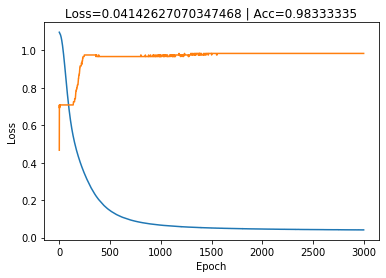

In [30]:
graph(hist1)

- This ocillation on accuracy makes me confuse in the beggining, it seems ok but I will try to understand it better later

In [31]:
# Second Model 2 Hidden layers with 4 neurons each
model2 = Iris_MLP(h1=4,h2=4)
hist2 = model2.fit(X_train, y_train, epochs=3000, verbose=0)
print(hist2.history['loss'][-1])
print(hist2.history['accuracy'][-1])

0.04727664639552434
0.975


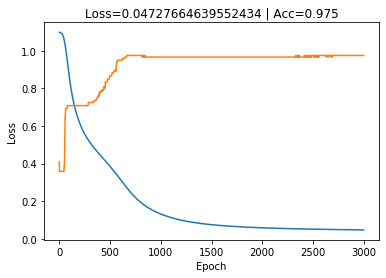

In [32]:
graph(hist2)

In [33]:
# Third model = 3 Hidden layers with 8 neurons each
model3 = Iris_MLP(h1=8,h2=8,h3=8)
hist3 = model3.fit(X_train, y_train, epochs=3000, verbose=0)
print(hist3.history['loss'][-1])
print(hist3.history['accuracy'][-1])

0.0377159483730793
0.98333335


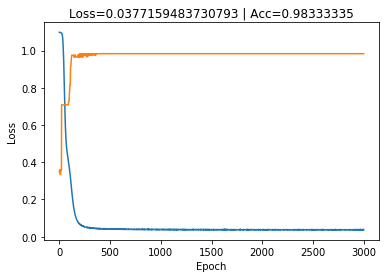

In [34]:
graph(hist3)

- Ocillating Loss

### Evaluating our models

In [35]:
model1.evaluate(X_test,y_test,verbose=2)

[0.0847027450799942, 0.9666666388511658]

In [36]:
model2.evaluate(X_test,y_test,verbose=2)

[0.07417023181915283, 1.0]

For now, i think the Loss stills big

In [37]:
model3.evaluate(X_test,y_test,verbose=2)

[0.10776757448911667, 0.9333333373069763]

### Another Tests
**Here I'll try different models.**

In [56]:
# 3 Hidden Layers 4-8-4 Neurons
model4 = Iris_MLP(h1=4,h2=8,h3=4)
hist4 = model4.fit(X_train, y_train, epochs=3000, verbose=0)
print(hist4.history['loss'][-1])
print(hist4.history['accuracy'][-1])

0.038567180186510085
0.98333335


In [57]:
model4.evaluate(X_test,y_test,verbose=2)

[0.11779089272022247, 0.8999999761581421]

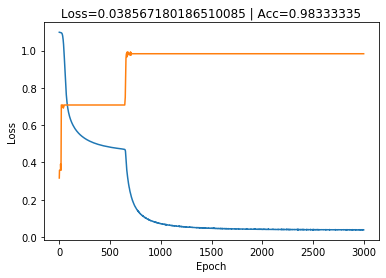

In [58]:
graph(hist4)

****

In [41]:
# 3 Hidden Layers 12 Neurons each
model5 = Iris_MLP(h1=12,h2=12,h3=12)
hist5 = model5.fit(X_train, y_train, epochs=3000, verbose=0)
print(hist5.history['loss'][-1])
print(hist5.history['accuracy'][-1])

0.03748746387039622
0.98333335


In [42]:
model5.evaluate(X_test,y_test,verbose=2)

[0.1022116020321846, 0.8999999761581421]

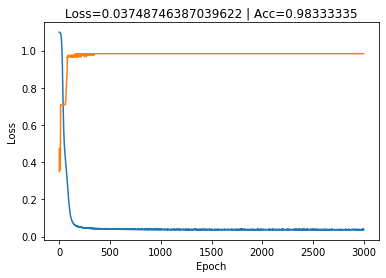

In [43]:
graph(hist5)

****

In [44]:
# 4 Hidden Layers, 12 neurons each
model6 = Iris_MLP(h1=12,h2=12,h3=12,h4=12)
hist6 = model6.fit(X_train, y_train, epochs=3000, verbose=0)
print(hist6.history['loss'][-1])
print(hist6.history['accuracy'][-1])

0.03837969667511061
0.98333335


In [45]:
model6.evaluate(X_test,y_test,verbose=2)

[0.09977136552333832, 0.9333333373069763]

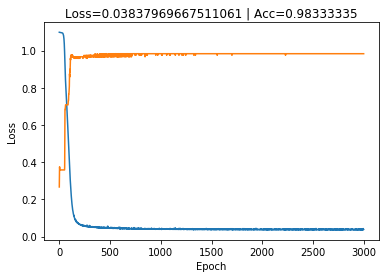

In [46]:
graph(hist6)

****

In [47]:
#
model7 = Iris_MLP(h1=2)
hist7 = model7.fit(X_train, y_train, epochs=5000, verbose=0)
print(hist7.history['loss'][-1])
print(hist7.history['accuracy'][-1])

0.04252581298351288
0.98333335


In [48]:
model7.evaluate(X_test,y_test,verbose=2)

[0.07904183119535446, 1.0]

min loss = 0.0847 with 1 Hlayer of 2 neurons with 96.66% acc

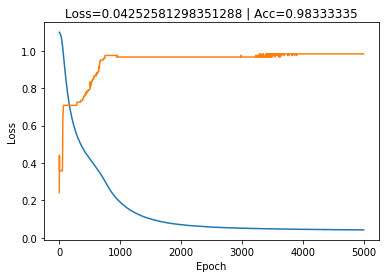

In [49]:
graph(hist7)

****

In [50]:
# 2 Hidden Layers with 120 neurons, now with sgd optimizer
model8 = Iris_MLP(h1=120,h2=120)
hist8 = model8.fit(X_train, y_train, epochs=10000, verbose=0)
print(hist8.history['loss'][-1])
print(hist8.history['accuracy'][-1])

0.0004282042849808931
1.0


In [51]:
model8.evaluate(X_test,y_test,verbose=2)

[0.06433680653572083, 0.9666666388511658]

**I discover that model8 is better than all others.  
Loss stills big imo.  
Let's print the graph.**

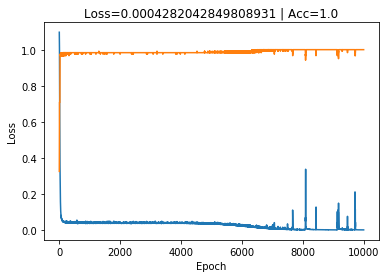

In [52]:
graph(hist8)

- Overfitting ?

**Let's try to predict some flowers**

In [53]:
model8.predict_classes(np.array([[0.86, 0.68, 0.79, 0.84]])) ## Class = 1

array([1])

In [54]:
model8.predict_classes(np.array([[0.60, 0.68, 0.20, 0.04]])) ## class = 0

array([0])

In [55]:
model8.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 120)               600       
_________________________________________________________________
dense_28 (Dense)             (None, 120)               14520     
_________________________________________________________________
dense_29 (Dense)             (None, 3)                 363       
Total params: 15,483
Trainable params: 15,483
Non-trainable params: 0
_________________________________________________________________


**I'll end this Notebook here.  
I could learn a lot during development and now I discovered somethings that I have to understand better before start the RNN practice.  
I intend to fix all this notebook later, when I learn more.  
I also intend to talk with some experient Data Scientist, to have a feedback. I hardly recommend you to do it if you're starting.**
****
**You can find more of my studies in my [Github](https://github.com/ViniciusRFerraz).**  

**Thanks for reading**